In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
df = pd.read_csv("HospitalAdmissionsData.csv")
df.head()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


In [6]:
# What are the column headers or features in this data set?
df.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [22]:
# How many features are floats? How many are integers?
float_count = 0
int_count = 0
obj_count = 0
for i in list(df.dtypes):
    print(i)
    float_count += (i == "float64")
    int_count += (i == "int64")
    obj_count += (i == "object")
print(float_count)
print(int_count)

int64
float64
int64
object
object
int64
object
int64
object
object
1
4


In [23]:
# Which features are objects (non-numeric variables)?
print(obj_count)

5


In [24]:
# What are the possible 'values' for insurance type?
df["Insurance_Type"].unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [25]:
# Show the summary statistics for the admission length.
stats.describe(df["AdmissionLengthDays"])

DescribeResult(nobs=58863, minmax=(-0.9451388890000001, 294.6604167), mean=10.13897774871043, variance=155.39145743335578, skewness=4.547507703001167, kurtosis=34.91875973033303)

In [31]:
# What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?
print("admission type:", stats.mode(df["Admission_Type"].to_numpy()))
print("insurance type:", stats.mode(df["Insurance_Type"].to_numpy()))
print("religion type:", stats.mode(df["Religion_Type"].to_numpy()))
print("race:", stats.mode(df["Race"].to_numpy()))
print("diagnosis:", stats.mode(df["Dx"].to_numpy()))

admission type: ModeResult(mode=array(['emergency'], dtype=object), count=array([41987]))
insurance type: ModeResult(mode=array(['medicare'], dtype=object), count=array([28157]))
religion type: ModeResult(mode=array(['catholic'], dtype=object), count=array([20561]))
race: ModeResult(mode=array(['white'], dtype=object), count=array([40927]))
diagnosis: ModeResult(mode=array(['newborn'], dtype=object), count=array([7823]))


The histogram using a log scale appears to be more spread out.


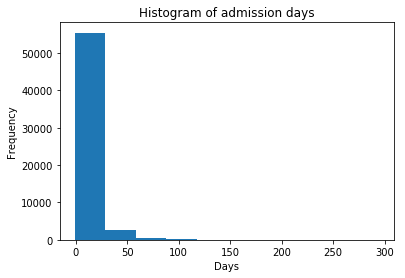

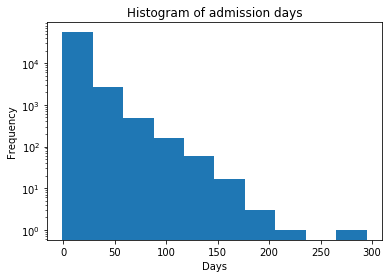

In [43]:
# Show a histogram for admission days (with appropriate labels, titles, etc), 
# and also show a histogram for admission days on a log scale. Describe what you see.
no_log = plt.figure(1)
plt.hist(df["AdmissionLengthDays"])
plt.title("Histogram of admission days")
plt.xlabel("Days")
plt.ylabel("Frequency")
no_log.show()

log = plt.figure(2)
plt.hist(df["AdmissionLengthDays"], log=True)
plt.title("Histogram of admission days")
plt.xlabel("Days")
plt.ylabel("Frequency")
log.show()

print("The histogram using a log scale appears to be more spread out.")

Text(0.5, 1.0, 'Boxplot of admission length\nwith death')

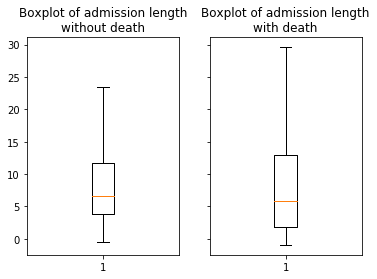

In [54]:
# Compare the average length of admission between those who died versus those who did not die. 
# Show a visualization, with appropriate labels, titles, etc.
fig, axes = plt.subplots(ncols = 2, sharey = True)
axes[0].boxplot(df[df["Death_1"] == 0]["AdmissionLengthDays"], 0, '')
axes[0].set_title("Boxplot of admission length\nwithout death")
axes[1].boxplot(df[df["Death_1"] == 1]["AdmissionLengthDays"], 0, '')
axes[1].set_title("Boxplot of admission length\nwith death")

Insurance_Type
government    0.050533
medicaid      0.065906
medicare      0.138651
private       0.061330
self pay      0.155738
Name: Death_1, dtype: float64


([<matplotlib.axis.XTick at 0x11fb5eef0>,
 <a list of 5 Text xticklabel objects>)

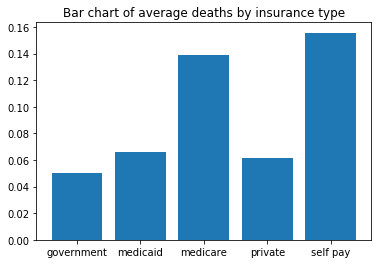

In [69]:
# Describe the association between death and insurance type and show a visualization or test.
types = df.groupby("Insurance_Type")
print(types.mean()["Death_1"])
plt.bar([0,1,2,3,4],types.mean()["Death_1"])
plt.title("Bar chart of average deaths by insurance type")
plt.xticks([0,1,2,3,4], ("government","medicaid","medicare","private","self pay"))